# [Hypothesis] Development in tourism caused lot of crimes.

Following types of crimes are identified as high correlation with tourism in our initial analysis.

1. Robbery
2. Offences under dangeroud drugs
3. Theft
4. Kidnapping
5. Offences with weapons

**Imports and workspace setting**

In [1]:
import csv
import math
import os

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stat

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
integrated_data = pd.read_csv('../data/integrated_data.csv')
print("Data set size : ", integrated_data.shape)
integrated_data = integrated_data.drop(integrated_data.columns[[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17]], axis=1)
integrated_data.head()

Data set size :  (25, 37)


,District,Rooms,Abduction / Kidnapping,H.B. & Theft,Grevious Hurt,Hurt by Knife etc.,Homicide/Abet. To commit suicide,Attempted Homicide,Rape / Incest,Riot,...,Extortion,"Cheating/Misappropriation C.B. Trust > Rs.100,000",Theft of Property (praedial produce > Rs.5000),Counterfeiting Currency,Offences against State,Cruelty & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs"
0,Ampara,610,29,239,69,38,16,12,37,1,...,2,232,242,1,0,1,2,1,0,1
1,Anuradhapura,979,68,834,108,72,24,15,199,4,...,9,270,584,6,0,23,2,4,1,7
2,Badulla,765,38,359,112,85,28,11,73,3,...,1,138,296,1,0,2,0,3,0,20
3,Batticaloa,883,21,227,56,89,11,2,52,0,...,4,225,221,1,0,6,3,1,1,3
4,Colombo,7519,154,2996,248,379,62,21,120,3,...,37,1736,2809,4,0,52,1,21,6,573


**Visualizing relation between tourism and crimes mentioned**

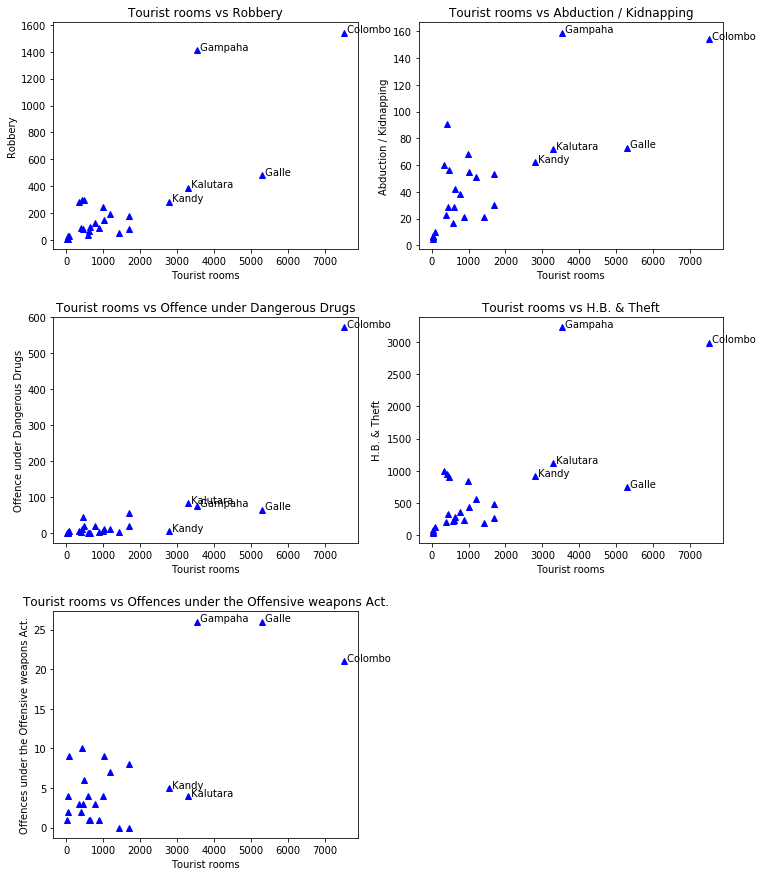

In [3]:
def plotScatterForCrime (column, tag, subPlotIndex):
    plt.subplot(3,2,subPlotIndex)
    plt.plot(integrated_data['Rooms'],  integrated_data[column], 'b^')
    plt.title('Tourist rooms vs ' + tag)
    plt.xlabel("Tourist rooms")
    plt.ylabel(tag)

    for i, txt in enumerate(integrated_data['District']):
        if integrated_data['Rooms'][i] >= 2000:
            plt.annotate(' ' + txt, (integrated_data['Rooms'][i], integrated_data[column][i]))

plt.figure(figsize=(12, 15))
plt.subplots_adjust(hspace=0.3)

plotScatterForCrime('Robbery', "Robbery", 1)
plotScatterForCrime('Abduction / Kidnapping', "Abduction / Kidnapping", 2)
plotScatterForCrime('Offence under Poisons, Opium & Dangerous Drugs', "Offence under Dangerous Drugs", 3)
plotScatterForCrime('H.B. & Theft', "H.B. & Theft", 4)
plotScatterForCrime('Offences under the Offensive weapons Act.', "Offences under the Offensive weapons Act.", 5)

**Colombo, Galle, Gampaha, Kandy, Kalutara is booming with tourism, so as crimes**

All these has more than 2000 tourist rooms, which is popular for tourists.

In [13]:
# high_tourism_districts = roomCount >= 2000

medianRoomCount = integrated_data.Rooms.median()
print("Median Room count = ", medianRoomCount)

high_tourism_districts = integrated_data.loc[(integrated_data["Rooms"] >= medianRoomCount)]
high_tourism_districts.head()

Median Room count =  765.0


,District,Rooms,Abduction / Kidnapping,H.B. & Theft,Grevious Hurt,Hurt by Knife etc.,Homicide/Abet. To commit suicide,Attempted Homicide,Rape / Incest,Riot,...,Extortion,"Cheating/Misappropriation C.B. Trust > Rs.100,000",Theft of Property (praedial produce > Rs.5000),Counterfeiting Currency,Offences against State,Cruelty & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs"
1,Anuradhapura,979,68,834,108,72,24,15,199,4,...,9,270,584,6,0,23,2,4,1,7
2,Badulla,765,38,359,112,85,28,11,73,3,...,1,138,296,1,0,2,0,3,0,20
3,Batticaloa,883,21,227,56,89,11,2,52,0,...,4,225,221,1,0,6,3,1,1,3
4,Colombo,7519,154,2996,248,379,62,21,120,3,...,37,1736,2809,4,0,52,1,21,6,573
5,Galle,5287,73,748,81,110,50,13,133,0,...,4,249,363,3,0,4,3,26,2,65


In [10]:
# low_tourism_districts =  roomCount < 2000
low_tourism_districts = integrated_data.loc[integrated_data["Rooms"] < medianRoomCount]
low_tourism_districts.head()

,District,Rooms,Abduction / Kidnapping,H.B. & Theft,Grevious Hurt,Hurt by Knife etc.,Homicide/Abet. To commit suicide,Attempted Homicide,Rape / Incest,Riot,...,Extortion,"Cheating/Misappropriation C.B. Trust > Rs.100,000",Theft of Property (praedial produce > Rs.5000),Counterfeiting Currency,Offences against State,Cruelty & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs"
0,Ampara,610,29,239,69,38,16,12,37,1,...,2,232,242,1,0,1,2,1,0,1
8,Jaffna,397,23,204,42,53,23,2,60,0,...,0,211,191,0,1,9,1,2,0,3
11,Kegalle,331,60,997,59,275,26,3,123,0,...,1,177,474,1,0,22,0,3,1,6
12,Kilinochchi,41,7,71,25,40,4,4,27,0,...,1,73,140,0,0,7,1,4,1,0
13,Kurunegala,421,91,952,73,191,58,12,207,1,...,11,537,668,1,0,7,1,10,0,10


Index(['Rooms', 'Abduction / Kidnapping', 'Robbery',
       'Cheating/Misappropriation C.B. Trust > Rs.100,000',
       'Theft of Property (praedial produce > Rs.5000)',
       'Offence under Poisons, Opium & Dangerous Drugs'],
      dtype='object')


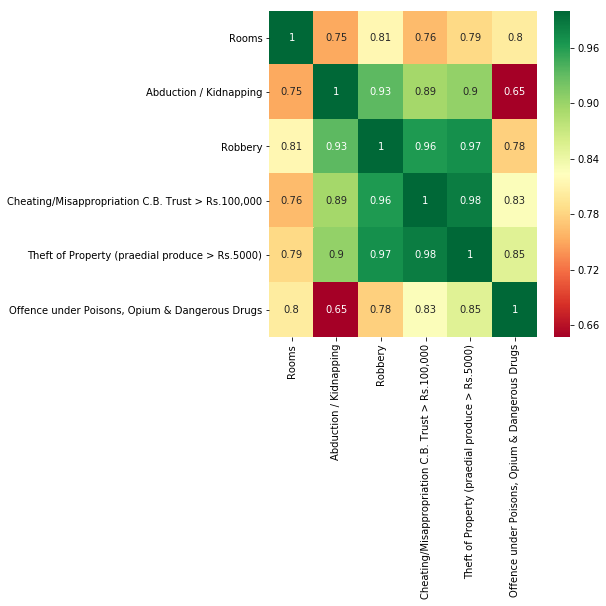

In [11]:
corrValues = integrated_data.corr(method='pearson')
topCorrWithRooms = corrValues.index[abs(corrValues['Rooms']) >= 0.75]
print(topCorrWithRooms)

plt.figure(figsize=(6,6))
ax = sns.heatmap(integrated_data[topCorrWithRooms].corr(), annot=True, cmap="RdYlGn")

In [15]:
## Prove normallity
value, p = stat.normaltest(integrated_data['Rooms'])

print(value, p)
if p >= 0.05:
    print('It is likely that number of rooms are normally distributed.')
else:
    print('It is unlikely that number of rooms are normally distributed.', p, value)

22.90857212478845 1.0603927968791886e-05
It is unlikely that number of rooms are normally distributed. 1.0603927968791886e-05 22.90857212478845


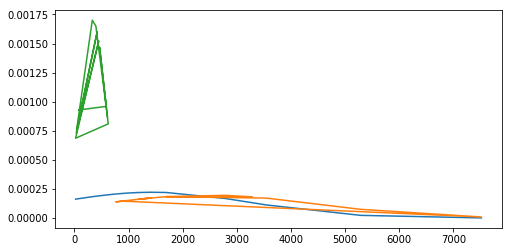

In [22]:
Population = integrated_data['Rooms'].sort_values();
PopulationRooms = stat.norm.pdf(Population, Population.mean(), Population.std())
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(Population, PopulationRooms, label='Rooms')

hour_data_fit1 = stat.norm.pdf(high_tourism_districts.Rooms, high_tourism_districts.Rooms.mean(), high_tourism_districts.Rooms.std())
ax.plot(high_tourism_districts.Rooms, hour_data_fit1, label='High Room Sample')

hour_data_fit2 = stat.norm.pdf(low_tourism_districts.Rooms, low_tourism_districts.Rooms.mean(), low_tourism_districts.Rooms.std())
ax.plot(low_tourism_districts.Rooms, hour_data_fit2, label='Low Room Sample')

#### Prove hypothesis


In [ ]:
## Conclusion/